<a href="https://colab.research.google.com/github/kellyf02/Class-2-Ferris/blob/main/Copy_of_Copy_of_FinancialDataAnalysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [5]:
# !pip install pandas-datareader

In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
sns.set()
plt.style.use('fivethirtyeight')
import datetime

from pandas_datareader import data as pdr
import yfinance as yf
# yf.pdr_override()

In [7]:
import yfinance as yf

end_date = datetime.date.today().strftime('%Y-%m-%d')
apple = yf.Ticker("AAPL")
AAPL = apple.history(start = "2020-01-01", end= end_date)
AAPL.head()

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
2020-01-02 00:00:00-05:00,71.721034,72.776613,71.466827,72.716087,135480400,0.0,0.0
2020-01-03 00:00:00-05:00,71.941343,72.771760,71.783977,72.009132,146322800,0.0,0.0
2020-01-06 00:00:00-05:00,71.127836,72.621616,70.876045,72.582878,118387200,0.0,0.0
2020-01-07 00:00:00-05:00,72.592594,72.849224,72.021231,72.241547,108872000,0.0,0.0
2020-01-08 00:00:00-05:00,71.943781,73.706302,71.943781,73.403671,132079200,0.0,0.0


## Get the Balance Sheet and Income Statements

In [8]:
balance_sheet = apple.balance_sheet
print("Balance Sheet:")
print(balance_sheet.head())

income_statement = apple.financials
print("\nIncome Statement:")
print(income_statement.head())

# Information about Apple:
info = apple.info
print(f"\nCompany: {info['longName']}")
print(f"Sector: {info['sector']}")
print(f"Industry: {info['industry']}")
print(f"Market Cap: {info['marketCap']}")
print(f"P/E Ratio: {info['trailingPE']}")

# dividend data
dividends = apple.dividends
print("Dividends:")
print(dividends.tail())

Balance Sheet:
                            2024-09-30      2023-09-30      2022-09-30  \
Treasury Shares Number             NaN             0.0             NaN   
Ordinary Shares Number   15116786000.0   15550061000.0   15943425000.0   
Share Issued             15116786000.0   15550061000.0   15943425000.0   
Net Debt                 76686000000.0   81123000000.0   96423000000.0   
Total Debt              106629000000.0  111088000000.0  132480000000.0   

                            2021-09-30 2020-09-30  
Treasury Shares Number             NaN        NaN  
Ordinary Shares Number   16426786000.0        NaN  
Share Issued             16426786000.0        NaN  
Net Debt                 89779000000.0        NaN  
Total Debt              136522000000.0        NaN  

Income Statement:
                                                        2024-09-30  \
Tax Effect Of Unusual Items                                    0.0   
Tax Rate For Calcs                                           0.241   

In [9]:
apple = yf.Ticker("AAPL")

tickers = ["SPY", "AAL", "ZM", "NFLX", "META", "TSLA", "DIS", "NVDA", "TGT", "VZ", 'AAPL']

end_date = datetime.date.today().strftime('%Y-%m-%d')
apple = yf.Ticker("AAPL")
AAPL = apple.history(start = "2020-01-01", end= "2024-12-31")

for ticker in tickers:
    globals()[ticker] = yf.Ticker(ticker)
    globals()[ticker] = globals()[ticker].history(start = "2020-01-01", end= "2024-12-31")

In [10]:
print(META.Close.mean())
META.describe()

299.9754138421519


,Open,High,Low,Close,Volume,Dividends,Stock Splits
count,1257.000000,1257.000000,1257.000000,1257.000000,1.257000e+03,1257.000000,1257.0
mean,299.811909,304.029697,295.797742,299.975414,2.315541e+07,0.001591,0.0
std,124.745251,125.702635,123.419958,124.602583,1.572882e+07,0.028172,0.0
min,89.657445,90.035660,87.676774,88.492935,4.726100e+06,0.000000,0.0
25%,207.860343,210.607429,205.541291,208.795944,1.453120e+07,0.000000,0.0
50%,277.850462,283.892024,274.983974,279.512634,1.938320e+07,0.000000,0.0
75%,345.003967,350.448326,341.570169,344.665588,2.711680e+07,0.000000,0.0
max,630.430133,637.318434,626.147422,631.608093,2.323166e+08,0.500000,0.0


## Now, let us keep only the closing prices for our analysis.

In [11]:
## keep only column close for all tickers
for ticker in tickers:
    globals()[ticker] = globals()[ticker].Close

SPY

,Close
Date,
2020-01-02 00:00:00-05:00,300.291595
2020-01-03 00:00:00-05:00,298.017731
2020-01-06 00:00:00-05:00,299.154633
2020-01-07 00:00:00-05:00,298.313477
2020-01-08 00:00:00-05:00,299.903351
...,...
2024-12-23 00:00:00-05:00,592.906433
2024-12-24 00:00:00-05:00,599.496582
2024-12-26 00:00:00-05:00,599.536499


In [12]:
df = pd.DataFrame({'Market': SPY, 'AAPL':AAPL, 'AAL':AAL, 'NFLX':NFLX, 'META':META,'ZM':ZM, 'TSLA':TSLA, 'DIS':DIS, 'NVDA':NVDA, 'TGT':TGT, 'VZ':VZ})
df.head()
df.tail()

,Market,AAPL,AAL,NFLX,META,ZM,TSLA,DIS,NVDA,TGT,VZ
Date,,,,,,,,,,,
2024-12-23 00:00:00-05:00,592.906433,254.989655,17.250000,911.450012,599.316772,85.269997,430.600006,111.400002,139.657150,130.804489,39.244587
2024-12-24 00:00:00-05:00,599.496582,257.916443,17.350000,932.119995,607.209778,85.669998,462.279999,112.559998,140.207108,131.280426,39.107025
2024-12-26 00:00:00-05:00,599.536499,258.735504,17.350000,924.140015,602.813660,85.440002,454.130005,112.550003,139.917130,135.236679,39.264240
2024-12-27 00:00:00-05:00,593.225464,255.309296,17.350000,907.549988,599.276855,83.820000,431.660004,111.550003,136.997391,134.354218,39.224934
2024-12-30 00:00:00-05:00,586.455811,251.923019,17.620001,900.429993,590.714417,82.730003,417.410004,110.800003,137.477356,133.908020,38.910507


In [13]:
# print(AAPL)
# print(AAPL.shift(1))

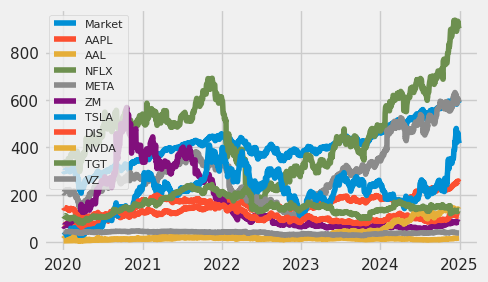

In [14]:
plt.style.use('fivethirtyeight')
plt.figure(figsize=(5, 3))
plt.plot(df, label=df.columns)
plt.legend(loc='upper left',fontsize=8)
plt.show()

## For financial analysis, we require the log returns (daily), rather than the raw stock prices. The formula for log returns is:

log(Today's Price/yesterday's price - 1)

In [15]:
# create new columns that are log returns of the columns
data = np.log(df/df.shift(1))
# data = (df-df.shift(1))/df.shift(1)
# replace first row with zeroes
data.iloc[0] = 0
data.head(5)

,Market,AAPL,AAL,NFLX,META,ZM,TSLA,DIS,NVDA,TGT,VZ
Date,,,,,,,,,,,
2020-01-02 00:00:00-05:00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
2020-01-03 00:00:00-05:00,-0.007601,-0.009770,-0.050769,-0.011926,-0.005305,-0.021177,0.029203,-0.011537,-0.016135,-0.010445,-0.010704
2020-01-06 00:00:00-05:00,0.003808,0.007937,-0.012007,0.030014,0.018658,0.044193,0.019072,-0.005819,0.004185,-0.009503,-0.002155
2020-01-07 00:00:00-05:00,-0.002816,-0.004714,-0.003667,-0.015242,0.002161,0.022220,0.038067,0.000343,0.012034,0.001779,-0.011179
2020-01-08 00:00:00-05:00,0.005315,0.015958,0.022522,0.025404,0.010087,0.009000,0.048033,-0.002061,0.001874,-0.003236,0.001844


## Find the betas of the stocks. The formula is shown below:

In [16]:
beta_aapl = (data[['Market','AAPL']].cov()/data['Market'].var()).iloc[0].iloc[1]
beta_aapl

np.float64(1.1898313471105408)

### Calculate beta using regression line.

In [17]:
beta, alpha = np.polyfit(data['Market'], data['AAPL'], 1)
alpha
beta

np.float64(1.1898313471105415)

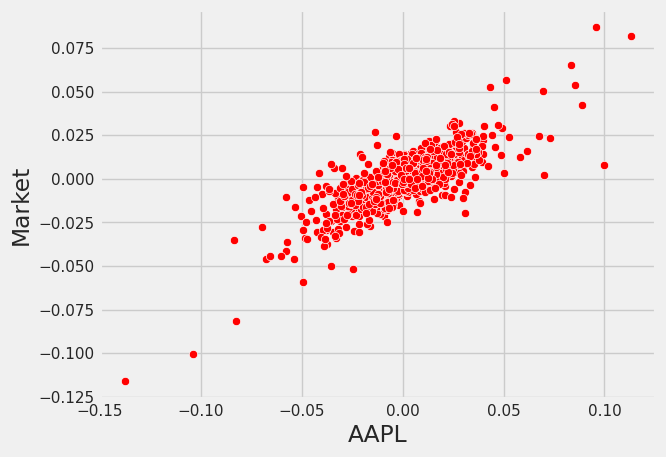

In [18]:
# plt.axvline(0, color='grey', alpha = 0.5)
# plt.axhline(0, color='grey', alpha = 0.5)
sns.scatterplot(y = 'Market', x = 'AAPL', data = data, color = 'red')
plt.show()

<Axes: xlabel='Market', ylabel='AAPL'>

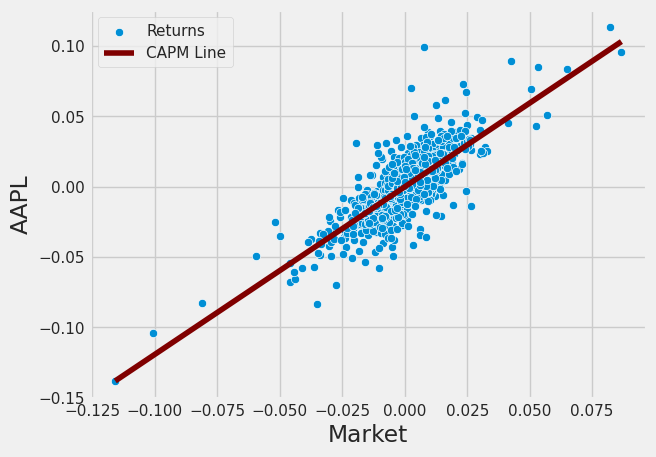

In [19]:
sns.scatterplot(y = 'AAPL', x = 'Market', data = data, label = 'Returns')
sns.lineplot(x = data['Market'], y = alpha + (data['Market']-alpha)*beta_aapl, color = 'maroon', label = 'CAPM Line')

### Convert Daily Stock Market Returns to Annualized Returns (assuming 252 trading days in a year).

In [20]:
rm = data['Market'].mean()*252
rm
cov = data[['Market','AAPL']].cov() *252
cov_aapl_market = cov.iloc[0,1]
cov_aapl_market
market_var = data['Market'].var()*252
market_var

AAPL_beta_annual = cov_aapl_market / market_var
print('The annualized beta will equal the one calculated at daily returns:',AAPL_beta_annual)

rf = 0.025
riskpremium = rm - rf

## CAPM
AAPL_capm_return = rf + AAPL_beta_annual*riskpremium

print(f"The annualized CAPM return of AAPL is {AAPL_capm_return*100:.2f}%")

The annualized beta will equal the one calculated at daily returns: 1.1898313471105406
The annualized CAPM return of AAPL is 15.49%


In [21]:
sharperatio = (rm-rf)/(data['AAPL'].std()*np.sqrt(252))
sharperatio
print(f"Sharpe Ratio: {round(sharperatio,4)}")

Sharpe Ratio: 0.345


In [22]:
netflix = yf.Ticker("NFLX")

tickers = ["SPY", "AAL", "ZM", "NFLX", "META", 'AAPL']

end_date = datetime.date.today().strftime('%Y-%m-%d')
apple = yf.Ticker("AAPL")
AAPL = apple.history(start = "2020-01-01", end= "2024-12-31")

for ticker in tickers:
    globals()[ticker] = yf.Ticker(ticker)
    globals()[ticker] = globals()[ticker].history(start = "2020-01-01", end= "2024-12-31")

In [23]:
print(META.Close.mean())
META.describe()

299.9754138421519


,Open,High,Low,Close,Volume,Dividends,Stock Splits
count,1257.000000,1257.000000,1257.000000,1257.000000,1.257000e+03,1257.000000,1257.0
mean,299.811909,304.029697,295.797742,299.975414,2.315541e+07,0.001591,0.0
std,124.745251,125.702635,123.419958,124.602583,1.572882e+07,0.028172,0.0
min,89.657445,90.035660,87.676774,88.492935,4.726100e+06,0.000000,0.0
25%,207.860343,210.607429,205.541291,208.795944,1.453120e+07,0.000000,0.0
50%,277.850462,283.892024,274.983974,279.512634,1.938320e+07,0.000000,0.0
75%,345.003967,350.448326,341.570169,344.665588,2.711680e+07,0.000000,0.0
max,630.430133,637.318434,626.147422,631.608093,2.323166e+08,0.500000,0.0


For NFLX

In [24]:
# print(NFLX)
# print(NFLX.shift(1))

In [25]:
beta_nflx = (data[['Market','NFLX']].cov()/data['Market'].var()).iloc[0].iloc[1]
beta_nflx

np.float64(1.0479750767744709)

In [26]:
beta, nflx = np.polyfit(data['Market'], data['NFLX'], 1)
alpha
beta

np.float64(1.047975076774471)

In [27]:
rm = data['Market'].mean()*252
rm
cov = data[['Market','NFLX']].cov() *252
cov_nflx_market = cov.iloc[0,1]
cov_nflx_market
market_var = data['Market'].var()*252
market_var

NFLX_beta_annual = cov_nflx_market / market_var
print('The annualized beta will equal the one calculated at daily returns:',NFLX_beta_annual)

rf = 0.025
riskpremium = rm - rf

## CAPM
NFLX_capm_return = rf + NFLX_beta_annual*riskpremium

print(f"The annualized CAPM return of NFLX is {NFLX_capm_return*100:.2f}%")

The annualized beta will equal the one calculated at daily returns: 1.047975076774471
The annualized CAPM return of NFLX is 13.94%


In [28]:
sharperatio = (rm-rf)/(data['NFLX'].std()*np.sqrt(252))
sharperatio
print(f"Sharpe Ratio: {round(sharperatio,4)}")

Sharpe Ratio: 0.233


For AAL

In [29]:
# print(AAL)
# print(AAL.shift(1))

In [30]:
beta_aal = (data[['Market','AAL']].cov()/data['Market'].var()).iloc[0].iloc[1]
beta_aal

np.float64(1.4080149785466345)

In [31]:
rm = data['Market'].mean()*252
rm
cov = data[['Market','AAL']].cov() *252
cov_aal_market = cov.iloc[0,1]
cov_aal_market
market_var = data['Market'].var()*252
market_var

AAL_beta_annual = cov_aal_market / market_var
print('The annualized beta will equal the one calculated at daily returns:',AAL_beta_annual)

rf = 0.025
riskpremium = rm - rf

## CAPM
AAL_capm_return = rf + NFLX_beta_annual*riskpremium

print(f"The annualized CAPM return of AAL is {AAL_capm_return*100:.2f}%")

The annualized beta will equal the one calculated at daily returns: 1.4080149785466345
The annualized CAPM return of AAL is 13.94%


In [32]:
sharperatio = (rm-rf)/(data['AAL'].std()*np.sqrt(252))
sharperatio
print(f"Sharpe Ratio: {round(sharperatio,4)}")

Sharpe Ratio: 0.1782


For META

In [33]:
# print(META)
# print(META.shift(1))

In [34]:
beta_meta = (data[['Market','META']].cov()/data['Market'].var()).iloc[0].iloc[1]
beta_meta

np.float64(1.329129278164332)

In [35]:
rm = data['Market'].mean()*252
rm
cov = data[['Market','META']].cov() *252
cov_meta_market = cov.iloc[0,1]
cov_meta_market
market_var = data['Market'].var()*252
market_var

META_beta_annual = cov_meta_market / market_var
print('The annualized beta will equal the one calculated at daily returns:',META_beta_annual)

rf = 0.025
riskpremium = rm - rf

## CAPM
META_capm_return = rf + META_beta_annual*riskpremium

print(f"The annualized CAPM return of META is {META_capm_return*100:.2f}%")

The annualized beta will equal the one calculated at daily returns: 1.329129278164332
The annualized CAPM return of META is 17.01%


In [36]:
sharperatio = (rm-rf)/(data['META'].std()*np.sqrt(252))
sharperatio
print(f"Sharpe Ratio: {round(sharperatio,4)}")

Sharpe Ratio: 0.2405


For ZM

In [37]:
# print(ZM)
# print(ZM.shift(1))

In [38]:
beta_zm = (data[['Market','ZM']].cov()/data['Market'].var()).iloc[0].iloc[1]
beta_zm

np.float64(0.6245571535454274)

In [39]:
rm = data['Market'].mean()*252
rm
cov = data[['Market','ZM']].cov() *252
cov_zm_market = cov.iloc[0,1]
cov_zm_market
market_var = data['Market'].var()*252
market_var

ZM_beta_annual = cov_zm_market / market_var
print('The annualized beta will equal the one calculated at daily returns:',ZM_beta_annual)

rf = 0.025
riskpremium = rm - rf

## CAPM
ZM_capm_return = rf + ZM_beta_annual*riskpremium

print(f"The annualized CAPM return of ZM is {ZM_capm_return*100:.2f}%")

The annualized beta will equal the one calculated at daily returns: 0.6245571535454274
The annualized CAPM return of ZM is 9.32%


In [40]:
sharperatio = (rm-rf)/(data['ZM'].std()*np.sqrt(252))
sharperatio
print(f"Sharpe Ratio: {round(sharperatio,4)}")

Sharpe Ratio: 0.1928


For TSLA

In [41]:
# print(TSLA)
# print(TSLA.shift(1))

In [42]:
beta_tsla = (data[['Market','TSLA']].cov()/data['Market'].var()).iloc[0].iloc[1]
beta_tsla

np.float64(1.6257709003458025)

In [43]:
rm = data['Market'].mean()*252
rm
cov = data[['Market','TSLA']].cov() *252
cov_tsla_market = cov.iloc[0,1]
cov_tsla_market
market_var = data['Market'].var()*252
market_var

TSLA_beta_annual = cov_zm_market / market_var
print('The annualized beta will equal the one calculated at daily returns:',TSLA_beta_annual)

rf = 0.025
riskpremium = rm - rf

## CAPM
TSLA_capm_return = rf + TSLA_beta_annual*riskpremium

print(f"The annualized CAPM return of TSLA is {TSLA_capm_return*100:.2f}%")

The annualized beta will equal the one calculated at daily returns: 0.6245571535454274
The annualized CAPM return of TSLA is 9.32%


In [44]:
sharperatio = (rm-rf)/(data['TSLA'].std()*np.sqrt(252))
sharperatio
print(f"Sharpe Ratio: {round(sharperatio,4)}")

Sharpe Ratio: 0.163


For DIS

In [45]:
# print(DIS)
# print(DIS.shift(1))

In [46]:
beta_dis = (data[['Market','DIS']].cov()/data['Market'].var()).iloc[0].iloc[1]
beta_dis

np.float64(1.0526028347052925)

In [47]:
rm = data['Market'].mean()*252
rm
cov = data[['Market','DIS']].cov() *252
cov_dis_market = cov.iloc[0,1]
cov_dis_market
market_var = data['Market'].var()*252
market_var

DIS_beta_annual = cov_zm_market / market_var
print('The annualized beta will equal the one calculated at daily returns:',DIS_beta_annual)

rf = 0.025
riskpremium = rm - rf

## CAPM
DIS_capm_return = rf + DIS_beta_annual*riskpremium

print(f"The annualized CAPM return of DIS is {DIS_capm_return*100:.2f}%")

The annualized beta will equal the one calculated at daily returns: 0.6245571535454274
The annualized CAPM return of DIS is 9.32%


In [48]:
sharperatio = (rm-rf)/(data['DIS'].std()*np.sqrt(252))
sharperatio
print(f"Sharpe Ratio: {round(sharperatio,4)}")

Sharpe Ratio: 0.3218


For NVDA

In [49]:
# print(NVDA)
# print(NVDA.shift(1))

In [50]:
beta_nvda = (data[['Market','NVDA']].cov()/data['Market'].var()).iloc[0].iloc[1]
beta_nvda

np.float64(1.7816150153760288)

In [51]:
rm = data['Market'].mean()*252
rm
cov = data[['Market','NVDA']].cov() *252
cov_nvda_market = cov.iloc[0,1]
cov_nvda_market
market_var = data['Market'].var()*252
market_var

NVDA_beta_annual = cov_zm_market / market_var
print('The annualized beta will equal the one calculated at daily returns:',NVDA_beta_annual)

rf = 0.025
riskpremium = rm - rf

## CAPM
NVDA_capm_return = rf + NVDA_beta_annual*riskpremium

print(f"The annualized CAPM return of NVDA is {NVDA_capm_return*100:.2f}%")

The annualized beta will equal the one calculated at daily returns: 0.6245571535454274
The annualized CAPM return of NVDA is 9.32%


In [52]:
sharperatio = (rm-rf)/(data['NVDA'].std()*np.sqrt(252))
sharperatio
print(f"Sharpe Ratio: {round(sharperatio,4)}")

Sharpe Ratio: 0.2041


For TGT

In [53]:
# print(TGT)
# print(TGT.shift(1))

In [54]:
beta_tgt = (data[['Market','TGT']].cov()/data['Market'].var()).iloc[0].iloc[1]
beta_tgt

np.float64(0.8400174298618698)

In [55]:
rm = data['Market'].mean()*252
rm
cov = data[['Market','TGT']].cov() *252
cov_tgt_market = cov.iloc[0,1]
cov_tgt_market
market_var = data['Market'].var()*252
market_var

TGT_beta_annual = cov_zm_market / market_var
print('The annualized beta will equal the one calculated at daily returns:',TGT_beta_annual)

rf = 0.025
riskpremium = rm - rf

## CAPM
TGT_capm_return = rf + TGT_beta_annual*riskpremium

print(f"The annualized CAPM return of TGT is {TGT_capm_return*100:.2f}%")

The annualized beta will equal the one calculated at daily returns: 0.6245571535454274
The annualized CAPM return of TGT is 9.32%


In [56]:
sharperatio = (rm-rf)/(data['TGT'].std()*np.sqrt(252))
sharperatio
print(f"Sharpe Ratio: {round(sharperatio,4)}")

Sharpe Ratio: 0.2983


For VZ

In [57]:
# print(VZ)
# print(VZ.shift(1))

In [58]:
beta_vz = (data[['Market','VZ']].cov()/data['Market'].var()).iloc[0].iloc[1]
beta_vz

np.float64(0.4243580409052066)

In [59]:
rm = data['Market'].mean()*252
rm
cov = data[['Market','TGT']].cov() *252
cov_vz_market = cov.iloc[0,1]
cov_vz_market
market_var = data['Market'].var()*252
market_var

VZ_beta_annual = cov_zm_market / market_var
print('The annualized beta will equal the one calculated at daily returns:',VZ_beta_annual)

rf = 0.025
riskpremium = rm - rf

## CAPM
VZ_capm_return = rf + VZ_beta_annual*riskpremium

print(f"The annualized CAPM return of VZ is {VZ_capm_return*100:.2f}%")

The annualized beta will equal the one calculated at daily returns: 0.6245571535454274
The annualized CAPM return of VZ is 9.32%


In [60]:
sharperatio = (rm-rf)/(data['VZ'].std()*np.sqrt(252))
sharperatio
print(f"Sharpe Ratio: {round(sharperatio,4)}")

Sharpe Ratio: 0.5102


Find re = rf + (rm - rf)Bi + (Small - Big Size)B + (High m/B - Low m/B)Bi, Fama - French 3 Factor Model






In [61]:
!pip install pandas-datareader statsmodels

In [62]:
import pandas as pd
import pandas_datareader.data as web
import statsmodels.formula.api as sm

In [63]:
# Download Fama-French 3 factors data
ff_factors = web.DataReader('F-F_Research_Data_Factors_daily', 'famafrench', start='2020-01-01', end='2024-12-31')[0]
# Rename the columns to something more convenient
ff_factors.columns = ['mkt-rf', 'smb', 'hml', 'rf']
ff_factors = ff_factors.div(100)  # Convert percentages to decimals

<ipython-input-63-9e2cd0db24c4>:2: FutureWarning: The argument 'date_parser' is deprecated and will be removed in a future version. Please use 'date_format' instead, or read your data in as 'object' dtype and then call 'to_datetime'.
  ff_factors = web.DataReader('F-F_Research_Data_Factors_daily', 'famafrench', start='2020-01-01', end='2024-12-31')[0]


In [65]:
data = np.log(df/df.shift(1))
# data = (df-df.shift(1))/df.shift(1)
# replace first row with zeroes
data.iloc[0] = 0
data.head(5)

,Market,AAPL,AAL,NFLX,META,ZM,TSLA,DIS,NVDA,TGT,VZ
Date,,,,,,,,,,,
2020-01-02 00:00:00-05:00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
2020-01-03 00:00:00-05:00,-0.007601,-0.009770,-0.050769,-0.011926,-0.005305,-0.021177,0.029203,-0.011537,-0.016135,-0.010445,-0.010704
2020-01-06 00:00:00-05:00,0.003808,0.007937,-0.012007,0.030014,0.018658,0.044193,0.019072,-0.005819,0.004185,-0.009503,-0.002155
2020-01-07 00:00:00-05:00,-0.002816,-0.004714,-0.003667,-0.015242,0.002161,0.022220,0.038067,0.000343,0.012034,0.001779,-0.011179
2020-01-08 00:00:00-05:00,0.005315,0.015958,0.022522,0.025404,0.010087,0.009000,0.048033,-0.002061,0.001874,-0.003236,0.001844


In [68]:
# Merge your data with the Fama-French factors, ensuring both have the same timezone awareness
all_data = pd.merge(data.tz_localize(None), ff_factors.tz_localize(None), left_index=True, right_index=True)

In [74]:
# Define the model for a specific stock (e.g., AAPL)
# Replace 'stock_ticker' with your desired stock ticker
stock_ticker = 'AAPL'
# Use the Q function to correctly quote column names with special characters like hyphens:
model = sm.ols(formula=f'{stock_ticker} ~ Q("mkt-rf") + smb + hml', data=all_data)

# Fit the model
results = model.fit()

# Get the model parameters (betas)
market_beta = results.params['Q("mkt-rf")'] # Access using the quoted name
smb_beta = results.params['smb']
hml_beta = results.params['hml']

# Calculate the expected return (re)
# Assuming rf (risk-free rate) is 0.025
rf = 0.025
rm = all_data['mkt-rf'].mean() + rf # market risk premium + risk-free rate
re = rf + (rm - rf) * market_beta + all_data['smb'].mean() * smb_beta + all_data['hml'].mean() * hml_beta

print(f"Expected return (re) for {stock_ticker}: {re:.4f}")

Expected return (re) for AAPL: 0.0256
